In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib.pyplot as plt 
import sklearn
# ROC CURVES
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn import datasets
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
def crossValidation(model,X,y,times):
    # CROSS VALIDATION
    scoring = ['precision', 'recall','accuracy','f1']
    scores = cross_validate(model, X, y, cv=times,scoring=scoring,return_train_score=True)
    print("TRAIN")
    print("Precision")
    print(sum(scores['train_precision'])/times)
    print("Recall")
    print(sum(scores['train_recall'])/times)
    print("Accuracy")
    print(sum(scores['train_accuracy'])/times)
    print("F1")
    print(sum(scores['train_f1'])/times)

    print("TEST")
    print("Precision")
    print(sum(scores['test_precision'])/times)
    print("Recall")
    print(sum(scores['test_recall'])/times)
    print("Accuracy")
    print(sum(scores['test_accuracy'])/times)
    print("F1")
    print(sum(scores['test_f1'])/times)

def scaling(X_train,X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
#     scaler.mean__
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    return X_train,X_test
def confusionMatrixResults(y_test,y_pred,model):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()

    print(classification_report(y_test, y_pred))
    confusion_matrix_graph = confusion_matrix(y_test, y_pred)


Background:
The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.
For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories:
• Normal
• Anomalous

In [2]:
# CHANGE THE y name from class to Class because python is confused

# RETRIEVE DATASET AND ONEHOT ENCODE CLASS
df = pd.read_csv ('Train_data.csv', sep=',')
y = pd.get_dummies(df.Class ,drop_first=True)
df=df.drop(['Class'], axis=1)
frames5 = [df,y]
df = pd.concat(frames5,axis=1)

print("SAMPLES NUMBER :"+str(len(df)))
len(df)
print("COLUMNS NUMBER :"+str(len(df.columns)))
len(df.columns)
print("COLUMNS NAMES:")
print(df.columns)

SAMPLES NUMBER :25192
COLUMNS NUMBER :42
COLUMNS NAMES:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'normal'],
      dtype='object')


In [3]:
# UNIQUE VALUES
print("----------")
print(df.num_outbound_cmds.unique())
print("----------")
print(df.is_host_login.unique())
print("----------")
print(df.is_guest_login.unique())
print("----------")
print(df.hot.unique())

print("----------")
print(df.num_shells.unique())
print("----------")
print(df.dst_host_count.unique())
print("----------")
print(df.num_access_files.unique())
print("----------")
print(df.srv_count.unique())
print("----------")
print(df.num_root.unique())



----------
[0]
----------
[0]
----------
[0 1]
----------
[ 0  5  6  4  2  1 28 30 22 24 14  3 15 25 19 18 77 17 11  7 20 12]
----------
[0 1]
----------
[150 255  30   8   2  91   1  66 157 238  87  43   9  41 181   4 131  26
 122 175 109 236  21  84  44  48 168  24 123  72 117 156 243   7 153 242
  10  23   6   3 107 195 138 176   5  94 108  50  11  31  27  83 185 196
  99  69  18 118 247  89 201 163 172  32 205 202 214  28  16 128  37  34
 193  39  29 101  38 235  75  73 212  64 230 137  13 127 106  45 251  77
 211  53 160  54 142  42  14  57 159  58 246  62  12  59 124 250  49 187
  67 126  36 120  25  76  51 135 121  52 219 170 173 229  95  68  79  55
 155  19 143 158 104 151 119 115 237 129 114 100 178 110 234  17 179  74
 254  63 133  85 190 221 164  60 152 191  22 145  47  98  65 208  20  93
 198 223  71  78 111 233 141 113  35 148 209  81 194 165 130  40 116 146
 253  15 197 244 169  88 149 245 218 186 216 103 188 228 112 215  80 140
 210 166 200  90  46 132 134 147 227  97 20

In [4]:
# DO NULL VALUES EXIST??

print("SUM OF NULL VALUES")
print(df.isnull().values.any())
print(df.isnull().sum())

SUM OF NULL VALUES
False
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate     

In [5]:
# SEE SHAPE
df.shape

# # SEE TYPES OF VARIABLES
print(df.dtypes)
# SEE FEATURES STATISTICS
print(df.describe())


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [6]:
# IS DATASEt UNBALANCED?
print("LENGTH OF DF")
print(len(df))
count=0
count2=0
for n in range(len(df)):
    if (df['normal'][n] == 1):
        count+=1
    if (df['normal'][n] == 0):
        count2+=1
print("NORMAL CLASS SAMPLES:")
print(count)
print("ANOMALY CLASS SAMPLES:")
print(count2)
print("IMBALANCE:")
imbalance=count-count2
print(imbalance)
print("DELETE MAJOR CLASS SAMPLES")
count=0
df1 = df.drop(df[(df.normal == 0)].index)
df2 = df.drop(df[(df.normal == 1)].index)
df1 = df1[:-imbalance]

frames = [df1,df2]
df = pd.concat(frames,axis=0)
df=df.reset_index(drop=True)
print(len(df))


LENGTH OF DF
25192
NORMAL CLASS SAMPLES:
13449
ANOMALY CLASS SAMPLES:
11743
IMBALANCE:
1706
DELETE MAJOR CLASS SAMPLES
23486


In [7]:
# CATEGORICAL DATA 
print("CATEGORICAL DATA UNIQUE VALUES")
print("SERVICE")
print(df.service.unique())
print("FLAG")
print(df.flag.unique())
print("PROTOCOL TYPE")
print(df.protocol_type.unique())

# GETDUMMIES OF CATEGORICAL TO SEE EXACT SCORE
XP= pd.get_dummies(df.protocol_type,prefix="onehot" )
XS = pd.get_dummies(df.service,prefix="onehot" )
XF= pd.get_dummies(df.flag,prefix="onehot" )
frames1 = [XP,y]
XPC = pd.concat(frames1,axis=1)
frames2 = [XS,y]
XSC = pd.concat(frames2,axis=1)
frames3 = [XF,y]
XFC = pd.concat(frames3,axis=1)


CATEGORICAL DATA UNIQUE VALUES
SERVICE
['ftp_data' 'other' 'http' 'telnet' 'domain_u' 'private' 'smtp' 'urp_i'
 'finger' 'ftp' 'ecr_i' 'ntp_u' 'eco_i' 'time' 'auth' 'shell' 'pop_3'
 'IRC' 'red_i' 'domain' 'X11' 'urh_i' 'remote_job' 'name' 'netbios_ns'
 'mtp' 'supdup' 'uucp_path' 'Z39_50' 'csnet_ns' 'uucp' 'netbios_dgm' 'bgp'
 'ldap' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois' 'imap4'
 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell' 'sql_net'
 'hostnames' 'exec' 'discard' 'nntp' 'courier' 'ctf' 'ssh' 'daytime'
 'netstat' 'nnsp' 'pop_2' 'printer' 'tim_i' 'pm_dump' 'netbios_ssn' 'rje'
 'http_8001']
FLAG
['SF' 'REJ' 'RSTO' 'S0' 'S1' 'RSTR' 'S3' 'S2' 'OTH' 'SH' 'RSTOS0']
PROTOCOL TYPE
['tcp' 'udp' 'icmp']


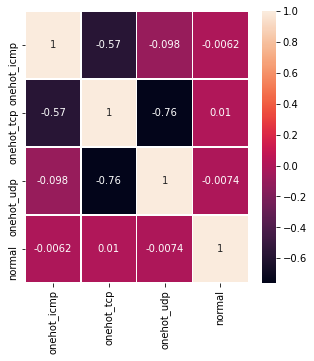

In [8]:
# CATEGORICAL DATA PROTOCOL TYPE
# NO STRONG CORROLATION TO MY CLASS

fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(XPC.corr(),annot = True,linewidths=.5, ax=ax)


df=df.drop(['protocol_type'], axis=1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


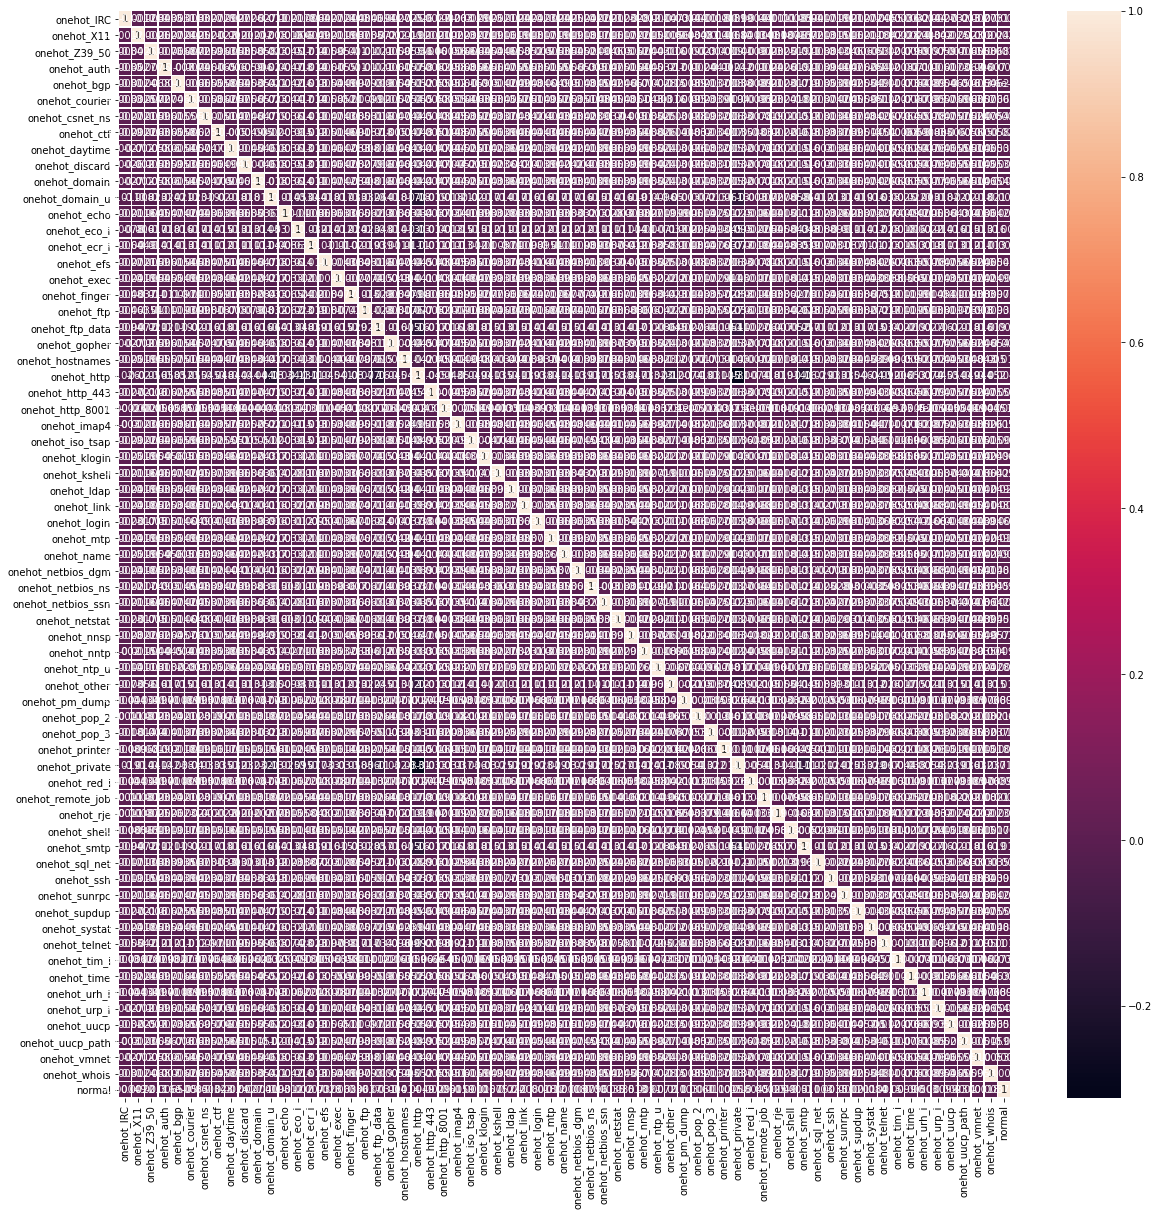

In [9]:
# STRONG CORROLATION ONLY TO 4 FEATURES
# XSC=SERVICE CATEGORIAL COLUMN TO MY CLASS

fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(XSC.corr(),annot = True,linewidths=.5, ax=ax)

for i in range(len(df)):
    if (df['service'][i] !="http" and df['service'][i] !="domain_u" 
        and df['service'][i] !="private" and df['service'][i] !="smtp"):
        df['service'][i]='otherService'
        
XS = pd.get_dummies(df.service,prefix="onehot" )
df=df.drop(['service'], axis=1)
frames = [XS,df]
X = pd.concat(frames,axis=1)

SF        13361
S0         6998
REJ        2154
RSTR        495
RSTO        299
S1           75
SH           43
RSTOS0       21
S2           20
S3           15
OTH           5
Name: flag, dtype: int64


/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


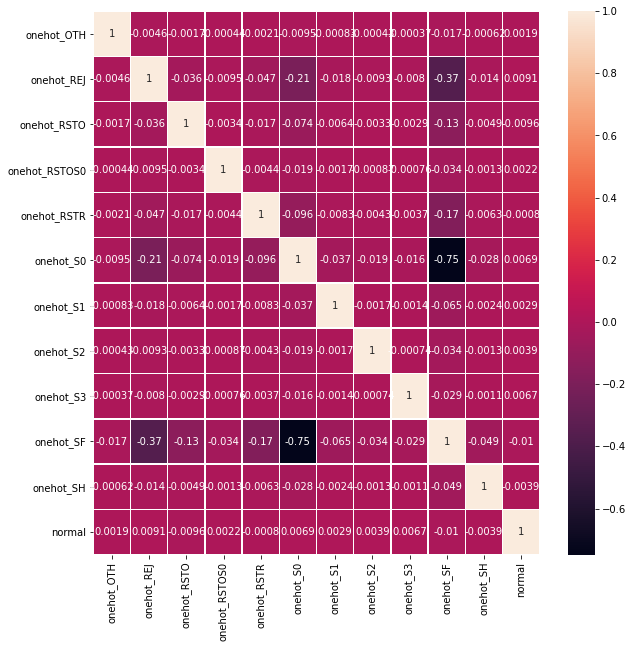

In [10]:
print(X.flag.value_counts())
# ONLY TWO FEATURES CORROLATION FLAG

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(XFC.corr(),annot = True,linewidths=.5, ax=ax)

for i in range(len(X['flag'])):
    if (X['flag'][i] !="S0" and X['flag'][i] !="SF"):
        X['flag'][i]='otherFlag'
        
XF = pd.get_dummies(X.flag,prefix="onehot" )
X=X.drop(['flag'], axis=1)
frames = [XF,X]
X = pd.concat(frames,axis=1)


<AxesSubplot:>

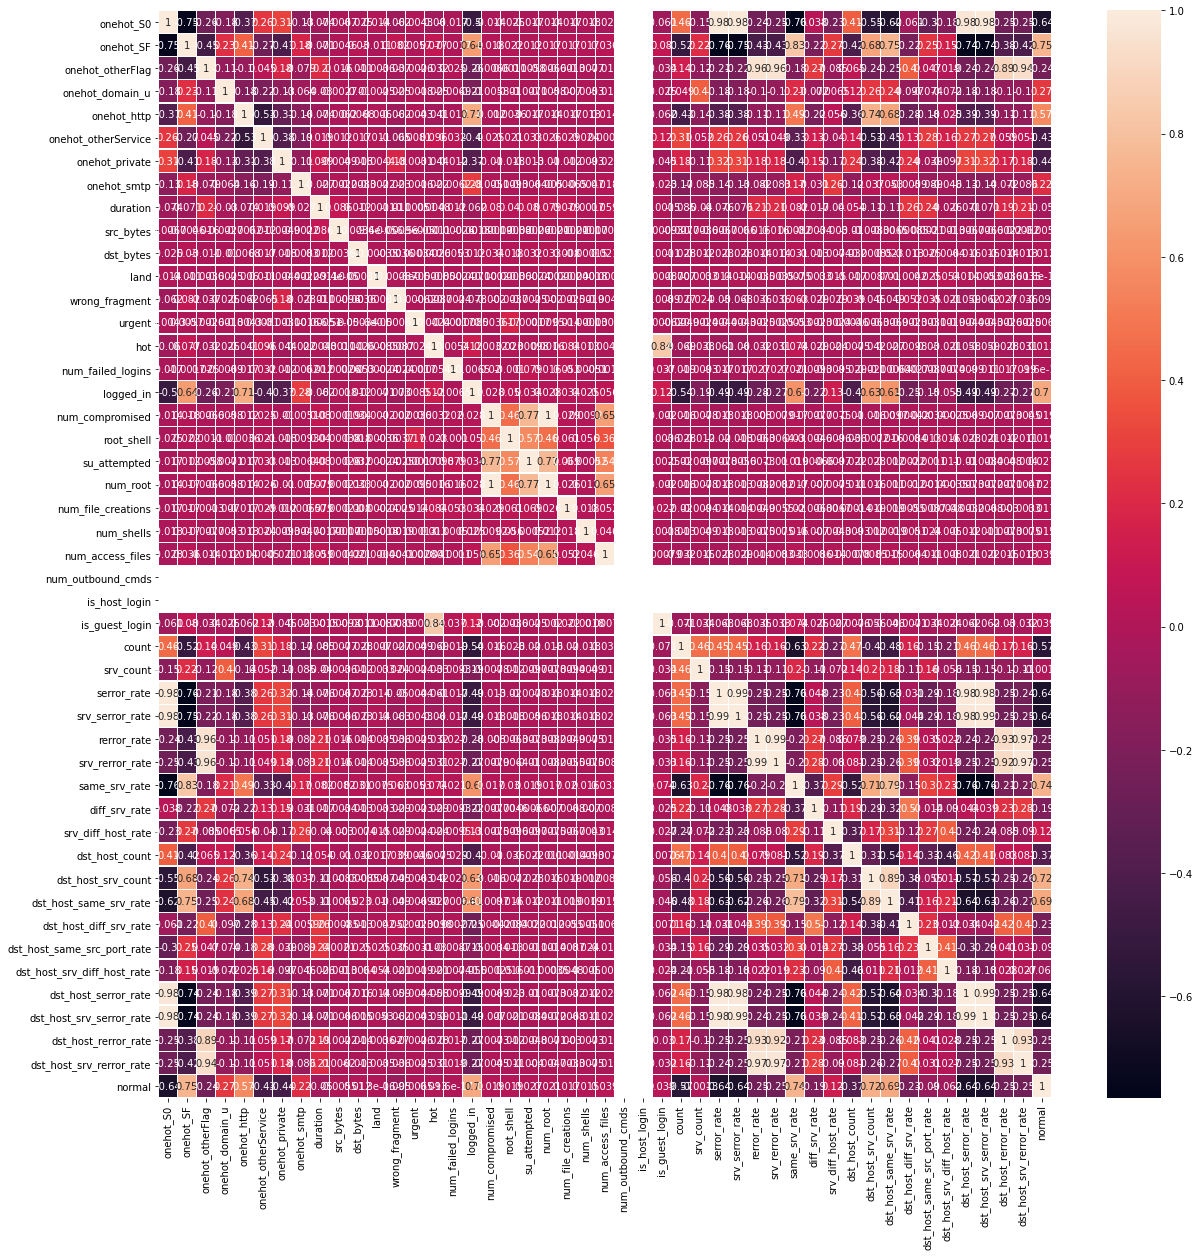

In [11]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(X.corr(),annot = True,linewidths=.5, ax=ax)


In [12]:
# DROP THE Following features because they only have one value so they dont help the prediction
X=X.drop(['num_outbound_cmds'], axis=1)
X=X.drop(['is_host_login'], axis=1)

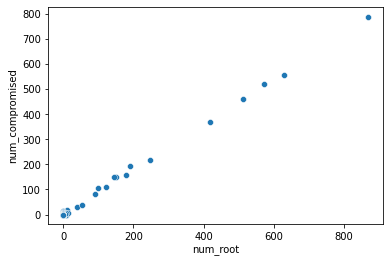

In [13]:
# TWO VALUES ARE  ALMOST THE SAME
sns.scatterplot(data=df, x="num_root", y="num_compromised")
X=X.drop(['num_compromised'], axis=1)


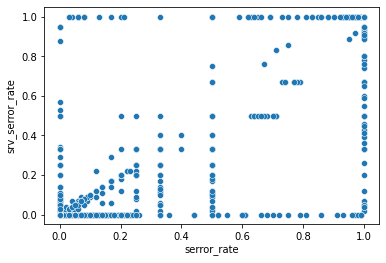

In [14]:

# TWO VALUES ARE  ALMOST THE SAME
sns.scatterplot(data=df, x="serror_rate", y="srv_serror_rate")
X=X.drop(['srv_serror_rate'], axis=1)

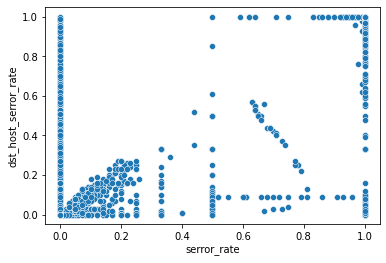

In [15]:
# TWO VALUES ARE  ALMOST THE SAME
sns.scatterplot(data=df, x="serror_rate", y="dst_host_serror_rate")
X=X.drop(['dst_host_serror_rate'], axis=1)



array([[<AxesSubplot:title={'center':'onehot_S0'}>,
        <AxesSubplot:title={'center':'onehot_SF'}>,
        <AxesSubplot:title={'center':'onehot_otherFlag'}>,
        <AxesSubplot:title={'center':'onehot_domain_u'}>,
        <AxesSubplot:title={'center':'onehot_http'}>,
        <AxesSubplot:title={'center':'onehot_otherService'}>],
       [<AxesSubplot:title={'center':'onehot_private'}>,
        <AxesSubplot:title={'center':'onehot_smtp'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'src_bytes'}>,
        <AxesSubplot:title={'center':'dst_bytes'}>,
        <AxesSubplot:title={'center':'land'}>],
       [<AxesSubplot:title={'center':'wrong_fragment'}>,
        <AxesSubplot:title={'center':'urgent'}>,
        <AxesSubplot:title={'center':'hot'}>,
        <AxesSubplot:title={'center':'num_failed_logins'}>,
        <AxesSubplot:title={'center':'logged_in'}>,
        <AxesSubplot:title={'center':'root_shell'}>],
       [<AxesSubplot:title={'c

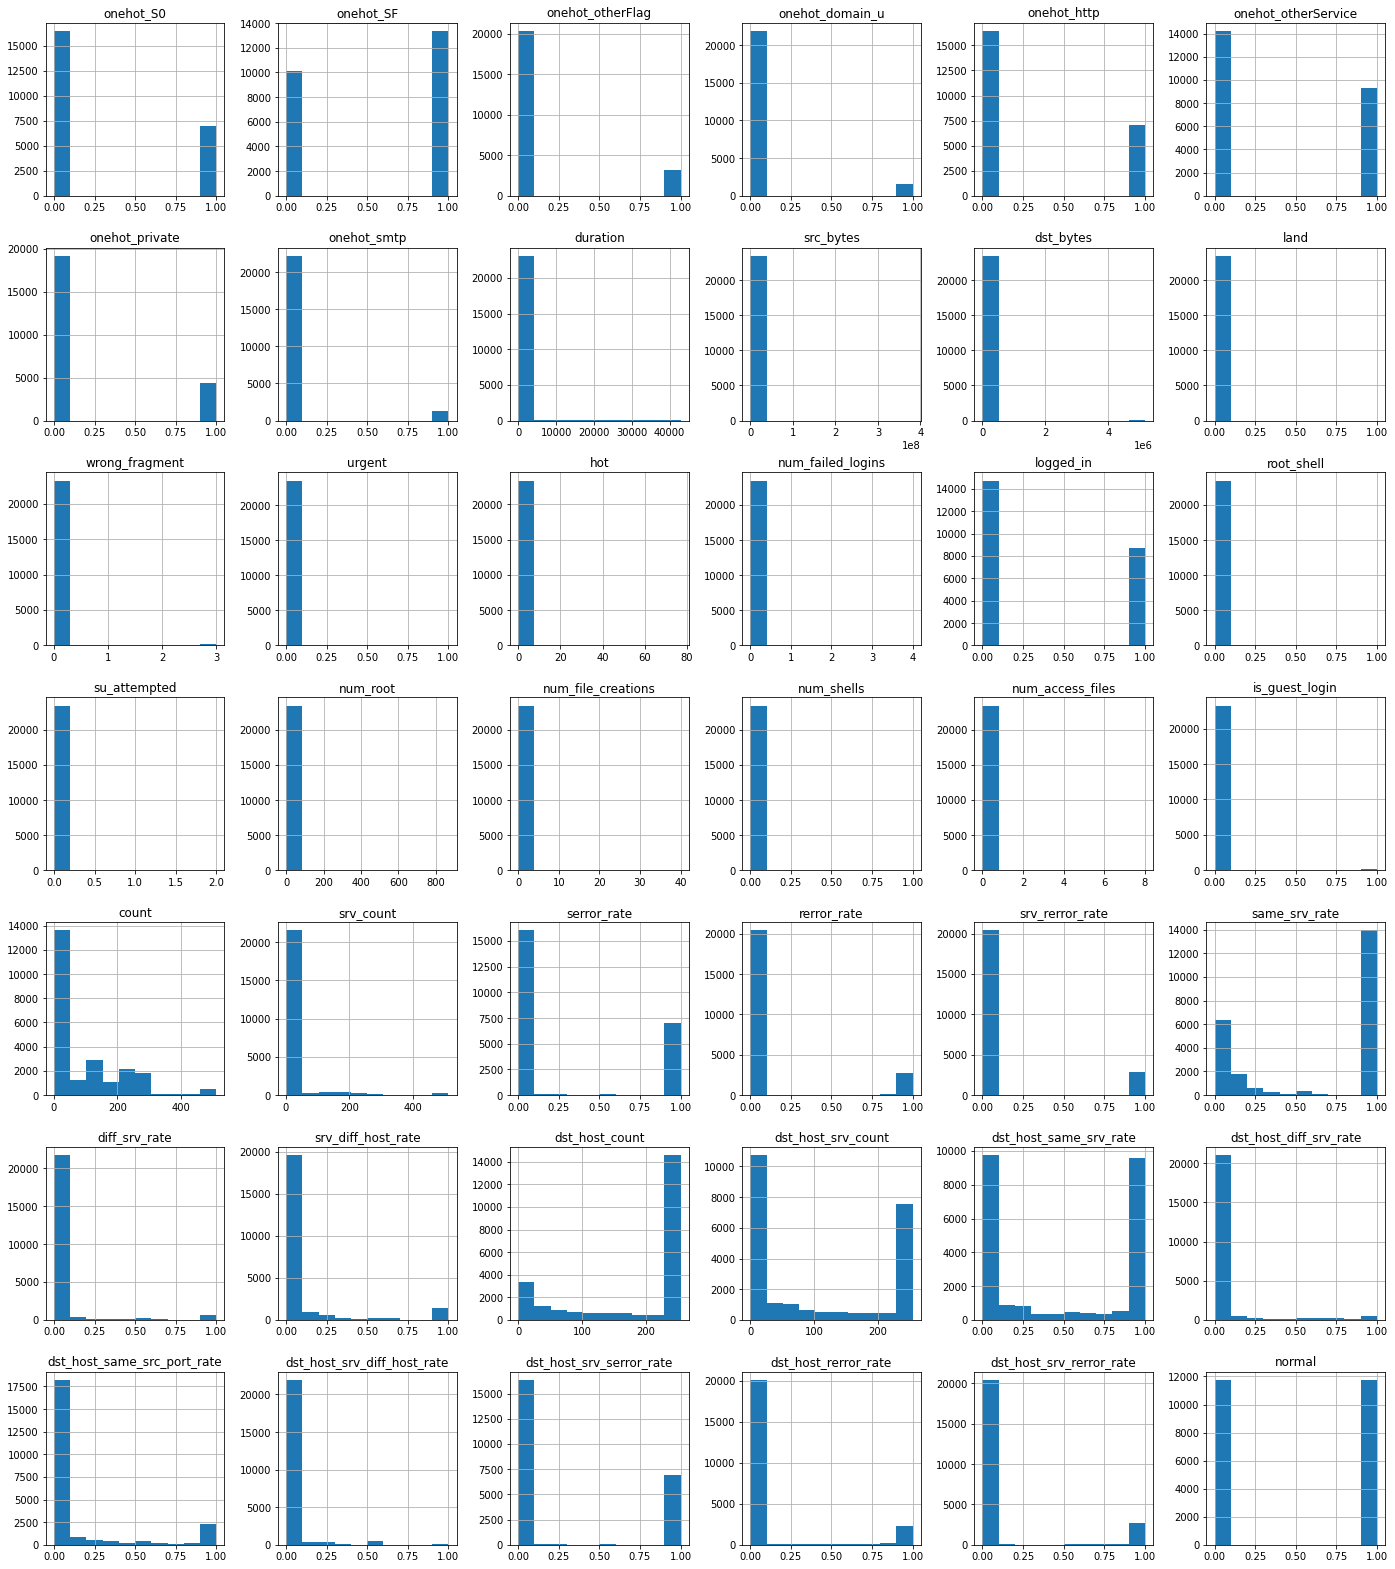

In [15]:
X.hist(figsize = (24,28))

In [16]:
# OUTLIER HUNTING PART 1
print("------")
print(X.num_shells.value_counts())
print("------")
print(X.urgent.value_counts())
print("------")
# print(X.hot.value_counts())
print("------")
print(X.land.value_counts())
print("------")
print(X.su_attempted.value_counts())
count=0
countA=0
for i in range(len(X)):
    
    if(X['urgent'][i]==1):
        if(X['normal'][i]==0):
            count+=1
print("attacks : "+str(count)+"of total :"+ str(countA))    
count=0
countA=0
for i in range(len(X)):
    if(X['num_shells'][i]==1):
        countA+=1
        if(X['normal'][i]==0):
            count+=1
print("attacks : "+str(count)+"of total :"+ str(countA))       
count=0   
countA=0
for i in range(len(X)):
    if(X['su_attempted'][i]!=0):
        countA+=1
        if(X['normal'][i]==0):
            count+=1
print("attacks : "+str(count)+"of total :"+ str(countA))     
count=0
countA=0
for i in range(len(X)):

    if(X['land'][i]!=0):
        countA+=1
        if(X['normal'][i]==0):
            count+=1
print("attacks : "+str(count)+"of total :"+ str(countA))          
        
X=X.drop(['num_shells'], axis=1)
X=X.drop(['urgent'], axis=1)
X=X.drop(['land'], axis=1)
X=X.drop(['su_attempted'], axis=1)



------
0    23477
1        9
Name: num_shells, dtype: int64
------
0    23485
1        1
Name: urgent, dtype: int64
------
------
0    23484
1        2
Name: land, dtype: int64
------
0    23468
2       11
1        7
Name: su_attempted, dtype: int64
attacks : 1of total :0
attacks : 1of total :9
attacks : 0of total :18
attacks : 1of total :2


0    23262
3      187
1       37
Name: wrong_fragment, dtype: int64
226
1      4657
2      2324
3      1126
4      1004
5       853
       ... 
456       1
307       1
355       1
403       1
450       1
Name: srv_count, Length: 412, dtype: int64
244


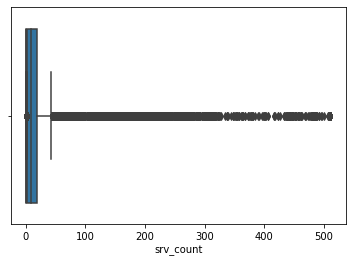

In [17]:
# OUTLIER HUNTING PART 2
import seaborn as sns
sns.boxplot(x=X.dst_host_rerror_rate)
print(X.wrong_fragment.value_counts())

# STAYS
count+=1
for i in range(len(X)):
    if(X['wrong_fragment'][i]!=0):
        if(X['normal'][i] ==0):
            count+=1
print(count)        
        
    
sns.boxplot(x=X.srv_count)
print(X.srv_count.value_counts())

# STAYS
count=0
for i in range(len(X)):
        if(X['srv_count'][i]>500):
            if(X['normal'][i] ==0):
                count+=1
#             count+=1
print(count)        
        


In [19]:
model = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

modelSVC = make_pipeline(StandardScaler(), model)
crossValidation(modelSVC,X,y,times)
# SPLIT TEST AND TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
# SCALING
X_train,X_test=scaling(X_train,X_test)
modelSVC.fit(X_train, y_train) 
y_pred=modelSVC.predict(X_test)
confusionMatrixResults(y_test,y_pred,modelSVC)

# HYPERTUNING OF

from sklearn.model_selection import GridSearchCV
modelDecisionTree =DecisionTreeClassifier()
parameters = {'criterion':('gini', 'entropy'), 'max_depth':(1,5,30,None), 'random_state':(1,5,30,None), 'min_impurity_split':(0.1,0.5,None),'splitter':('best','random')}
clf=GridSearchCV(estimator=modelDecisionTree,param_grid=parameters)
clf.fit(X_train, y_train)

sorted(clf.cv_results_.keys())

In [18]:
la = X.copy()

In [18]:
la2 = X.copy()
lay=  y.copy()

In [17]:
# DROP CLASS
y = X.normal
X=X.drop(['normal'], axis=1)
# SHUFFLE
X, y = shuffle(X,y, random_state=0)
# MAKE NUMPY
X=pd.DataFrame(X).to_numpy()
y=pd.DataFrame(y).to_numpy()
# SPLIT TEST AND TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40,stratify=y )
# SCALING
X_train,X_test=scaling(X_train,X_test)
# KFOLD TIMES
times=4

------------------------------
DECISIONTREE
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2923
           1       0.99      0.99      0.99      2949

    accuracy                           0.99      5872
   macro avg       0.99      0.99      0.99      5872
weighted avg       0.99      0.99      0.99      5872

TRAIN
Precision
1.0
Recall
0.9999432302013498
Accuracy
0.9999716142950181
F1
0.9999716134891785
TEST
Precision
0.9953965509321565
Recall
0.9941241081748511
Accuracy
0.9947628627781591
F1
0.9947591647453965
Score at test
0.9930177111716622
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.993


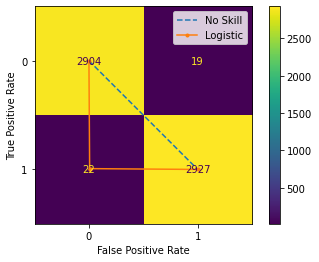

In [56]:
print("------------------------------")
print("DECISIONTREE")
# parameters = {'criterion':('gini', 'entropy'), 'max_depth':(1,5,30,None), 
#               'random_state':(1,5,30,None),  'splitter':('best','random')}


# HYPERTUNE IT:
# parameters = {'criterion':('gini', 'entropy'), 'max_depth':(50,70,100,None), 
#               'random_state':(1,5,30,None),  'splitter':('best','random')}
# modelDecisionTree=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters)
# print("BEST HYPERPARAMETERS")
# print(modelDecisionTree.best_params_)
# {'criterion': 'gini', 'max_depth': 50, 'random_state': 5, 'splitter': 'best'}

modelDecisionTree=DecisionTreeClassifier(criterion='gini',max_depth=50,random_state=5,splitter='best')

# FIT
modelDecisionTree.fit(X_train, y_train)
y_pred=modelDecisionTree.predict(X_test)
# CONFUSION MATRIX
confusionMatrixResults(y_test,y_pred,modelDecisionTree)
# mDecisionTree=DecisionTreeClassifier(modelDecisionTree.best_params_)
# CROSS VALIDATION WITH BEST PARAMETERS
crossValidation(modelDecisionTree,X,y,times)
print("Score at test")
print(modelDecisionTree.score(X_test, y_test))
rocCurves(modelDecisionTree,y_test,X_test,X_train,y_train)



In [ ]:
print("------------------------------")
print("SVM")
# HYPERTUNE IT
# parameters = {'kernel':('linear', 'poly','rbf', 'sigmoid', 'precomputed'),'random_state':(None,1,4,8),
#               'degree':(1,3,10), 'gamma':('scale','auto'), 'probability':(True,False),
#               'decision_function_shape':('ovo','ovr')}
# modelSVC=GridSearchCV(estimator=SVC(),param_grid=parameters)
# print("BEST HYPERPARAMETERS")
# print(modelSVC.best_params_)
# mSVC=SVC(modelSVC.best_params_)

# poly ,None,1,scale,True,ovo
modelSVC=SVC(kernel='poly',random_state=None,degree=1, gamma='scale', probability=True,
              decision_function_shape='ovo')

# FIT
modelSVC.fit(X_train, y_train.ravel())
y_pred=modelSVC.predict(X_test)
# CONFUSION MATRIX
confusionMatrixResults(y_test,y_pred.ravel(),modelSVC)
# CROSS VALIDATION WITH BEST PARAMETERS
crossValidation(modelSVC,X,y.ravel(),times)
print("Score at test")
print(modelSVC.score(X_test, y_test.ravel()))
rocCurves(modelSVC,y_test,X_test,X_train,y_train)




------------------------------
SVM
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2936
           1       0.95      0.97      0.96      2936

    accuracy                           0.96      5872
   macro avg       0.96      0.96      0.96      5872
weighted avg       0.96      0.96      0.96      5872



------------------------------
Multilayer-Perceptron
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2936
           1       0.99      0.99      0.99      2936

    accuracy                           0.99      5872
   macro avg       0.99      0.99      0.99      5872
weighted avg       0.99      0.99      0.99      5872



/home/dimitris/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/dimitris/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/dimitris/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/dimitris/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

TRAIN
Precision
0.9504442908030775
Recall
0.9603170148023407
Accuracy
0.9550656497887442
F1
0.9552726561026698
TEST
Precision
0.9536572618609503
Recall
0.9558873805290838
Accuracy
0.9546956023626962
F1
0.9547187445345147
Score at test
0.9911444141689373


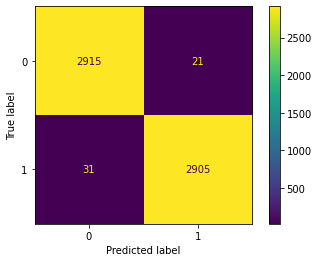

In [20]:
print("------------------------------")
print("Multilayer-Perceptron")
# parameters = {'activation':('identity', 'logistic','tanh','relu'), 'solver':('lbfgs', 'sgd','adam'),
#               'learning_rate':('constant','invscaling','adaptive'), 
#               'max_iter':(1,200,500),'nesterovs_momentum':(True,False)}
# HYPERTUNE IT
# adaptive,200
# parameters = {activation='relu', solver='adam',
#               learning_rate='adaptive', 
#               max_iter=200,nesterovs_momentum=True}
# modelMLP=GridSearchCV(estimator=MLPClassifier(),param_grid=parameters)
# print(modelMLP.best_params_)
modelMLP=MLPClassifier(activation='relu', solver='adam',learning_rate='adaptive', max_iter=200,nesterovs_momentum=True)

# FIT
modelMLP.fit(X_train, y_train.ravel())
y_pred=modelMLP.predict(X_test)

# CONFUSION MATRIX
confusionMatrixResults(y_test,y_pred,modelMLP)
# mMLP=MLPClassifier(modelMLP.best_params_)
# CROSS VALIDATION WITH BEST PARAMETERS
crossValidation(modelMLP,X,y.ravel(),times)
print("Score at test")
print(modelMLP.score(X_test, y_test))

rocCurves(modelMLP,y_test,X_test,X_train,y_train)


------------------------------
Kneighbors
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2936
           1       0.99      0.99      0.99      2936

    accuracy                           0.99      5872
   macro avg       0.99      0.99      0.99      5872
weighted avg       0.99      0.99      0.99      5872



/home/dimitris/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dimitris/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dimitris/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dimitris/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

TRAIN
Precision
0.9999432366462382
Recall
1.0
Accuracy
0.9999716142950181
F1
0.9999716167119885
TEST
Precision
0.9922258140159372
Recall
0.9885039270478905
Accuracy
0.9903772749560602
F1
0.9903592463209732
Score at test
0.9918256130790191


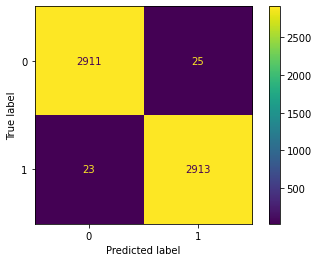

In [21]:
print("------------------------------")
print("Kneighbors")
from sklearn.model_selection import GridSearchCV
# HYPERTUNE IT

# {'n_neighbors': 1, 'weights': 'uniform'}
# parameters = {'n_neighbors':(1,5,10), 'weights':('uniform','distance'), 
#               'algorithm':('auto','ball_tree','kd_tree','brute'), 
#               'n_jobs':(1,5,8,None),'leaf_size':(1,30,50)}
# print("BEST HYPERPARAMETERS")
# mKneigh=KNeighborsClassifier(modelKneigh.best_params_)
# print(modelKneigh.best_params_)
# modelKneigh=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters)

modelKneigh=KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='auto',n_jobs=1,leaf_size=1)


# FIT
modelKneigh.fit(X_train, y_train.ravel())
y_pred=modelKneigh.predict(X_test)
# CONFUSION MATRIX
confusionMatrixResults(y_test,y_pred,modelKneigh)

# CROSS VALIDATION WITH BEST PARAMETERS
crossValidation(modelKneigh,X,y.ravel(),times)
print("Score at test")
print(modelKneigh.score(X_test, y_test))
rocCurves(modelKneigh,y_test,X_test,X_train,y_train)


In [22]:
print("------------------------------")
print("-------------PCA--------------")
print("------------------------------")


# PCA HELPS
pca = PCA(n_components=20)
XP = pca.fit_transform(X)
# SPLIT TEST AND TRAIN
X_train, X_test, y_train, y_test = train_test_split(XP, y, test_size=0.25, random_state=40)
# SCALING
X_train,X_test=scaling(X_train,X_test)





------------------------------
-------------PCA--------------
------------------------------


------------------------------
Quadratic
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2923
           1       0.94      0.98      0.96      2949

    accuracy                           0.96      5872
   macro avg       0.96      0.96      0.96      5872
weighted avg       0.96      0.96      0.96      5872



/home/dimitris/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/dimitris/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/dimitris/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/dimitris/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

TRAIN
Precision
0.8606626539733594
Recall
0.9556045446313812
Accuracy
0.9001674022557276
F1
0.9054427373414169
TEST
Precision
0.8608730729642221
Recall
0.9549524437285603
Accuracy
0.8999828627015808
F1
0.9052380809538368
Score at test
0.9587874659400545


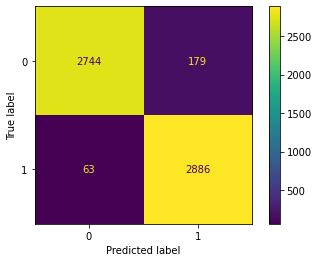

In [23]:
print("------------------------------")
print("Quadratic")
# parameters = {'store_covariance':(True,False), 'reg_param':(0,0.1,0.5)}
# # modelQuadratic=GridSearchCV(estimator=QuadraticDiscriminantAnalysis(),param_grid=parameters)
# # mQuadratic=QuadraticDiscriminantAnalysis(modelQuadratic.best_params_)
# print("BEST HYPERPARAMETERS")
# print(modelQuadratic.best_params_)

modelQuadratic=QuadraticDiscriminantAnalysis(store_covariance=True,reg_param=0.5)
# FIT
modelQuadratic.fit(X_train, y_train.ravel())
y_pred=modelQuadratic.predict(X_test)
# CONFUSION MATRIX
confusionMatrixResults(y_test,y_pred,modelQuadratic)

# CROSS VALIDATION WITH BEST PARAMETERS
crossValidation(modelQuadratic,XP,y,times)
print("Score at test")
print(modelQuadratic.score(X_test, y_test))
rocCurves(modelQuadratic,y_test,X_test,X_train,y_train)

------------------------------
RANDOM FOREST
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2923
           1       1.00      1.00      1.00      2949

    accuracy                           1.00      5872
   macro avg       1.00      1.00      1.00      5872
weighted avg       1.00      1.00      1.00      5872

TRAIN
Precision
1.0
Recall
0.9999432302013498
Accuracy
0.9999716142950181
F1
0.9999716134891785
TEST
Precision
0.994485677887252
Recall
0.9980413790622432
Accuracy
0.9962530506595714
F1
0.9962597738114053
Score at test
0.9965940054495913
No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


/usr/lib/python3/dist-packages/ipykernel_launcher.py:59: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/dimitris/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


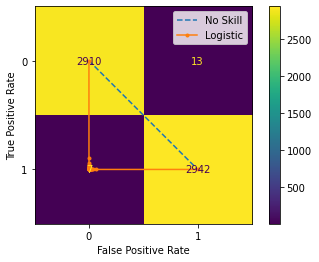

In [57]:

print("------------------------------")
print("RANDOM FOREST") 
# parameters = {'criterion':('gini', 'entropy'),'n_estimators':(50,100,500), 
#               'max_depth':(1,5,30,None), 'bootstrap':(True,False),
#               'warm_start':(False,True),'class_weight':('balanced','balanced_subsample',None)}
# modelRandom=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parameters)
# # FIT
# print("BEST HYPERPARAMETERS")
# print(modelRandom.best_params_)
# mRandom=RandomForestClassifier(modelRandom.best_params_)
# {'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 50, 'warm_start': True}


modelRandom=RandomForestClassifier(bootstrap=False,class_weight=None,criterion='entropy',max_depth=30,n_estimators=50,warm_start=True)
# FIT
modelRandom.fit(X_train, y_train.ravel())
y_pred=modelRandom.predict(X_test)
# CONFUSION MATRIX
confusionMatrixResults(y_test,y_pred,modelKneigh)

# CROSS VALIDATION WITH BEST PARAMETERS
crossValidation(modelRandom,XP,y.ravel(),times)
print("Score at test")
print(modelRandom.score(X_test, y_test))
rocCurves(modelRandom,y_test,X_test,X_train,y_train)


In [21]:
# SAVE MODELS
pickle.dump(modelRandom, open("DesicionTree", 'wb'))
pickle.dump(modelRandom, open("RandomForest", 'wb'))
pickle.dump(modelRandom, open("SVC", 'wb'))
pickle.dump(modelRandom, open("MLP", 'wb'))
pickle.dump(modelRandom, open("Kneighbors", 'wb'))
pickle.dump(modelRandom, open("Quadratic", 'wb'))
pickle.dump(modelRandom, open("NaiveBayes", 'wb'))

# LOAD A MODEL ETC RANDOM FOREST CLASSIFIER
loaded_model.score(X_test, y_test)
loaded_model = pickle.load(open("RandomForest", 'rb'))
result = loaded_model.score(X_test, Y_test)

NameError: name 'Y_test' is not defined

In [ ]:
train_sizes = [1, 100, 500, 2000, 5000, 10000,13000,17155]

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = KNeighborsClassifier(),
X=X ,
y =y, train_sizes = train_sizes, cv = 8,
scoring = 'accuracy')

In [35]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[       nan        nan        nan        nan        nan]
 [1.         1.         1.         1.         1.        ]
 [0.998      1.         1.         1.         1.        ]
 [0.9985     1.         1.         1.         1.        ]
 [0.9994     0.9994     0.9994     0.9994     0.9994    ]
 [0.99895479 0.9992161  0.99869349 0.99869349 0.99869349]]

 ----------------------------------------------------------------------

Validation scores:

 [[       nan        nan        nan        nan        nan]
 [0.50021286 0.6321056  0.64807324 0.63785395 0.64147328]
 [0.86611324 0.79071748 0.80051096 0.8041303  0.79902065]
 [0.89037888 0.87438791 0.87971045 0.88609751 0.88056206]
 [0.91890166 0.91483926 0.91696828 0.92356824 0.91441346]
 [0.93273734 0.93229721 0.93591654 0.93655525 0.92889078]]


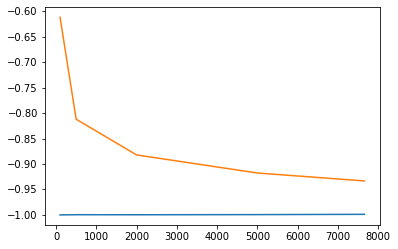

In [37]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

In [15]:
%store -r X

In [14]:
%store X

Stored 'X' (ndarray)


IndexError: index 2 is out of bounds for axis 1 with size 2

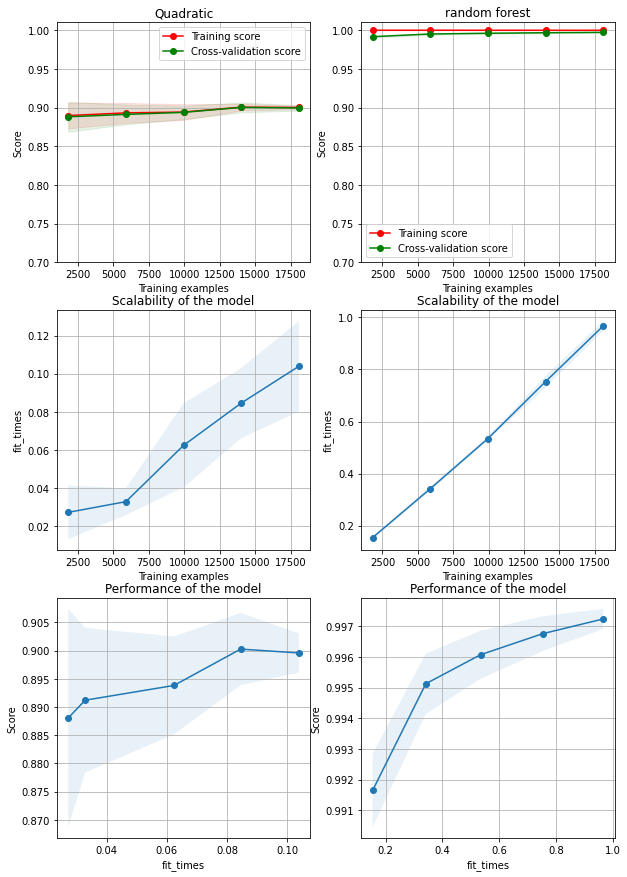

In [43]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
cv = ShuffleSplit(n_splits=10, test_size=0.23, random_state=0)
plot_learning_curve(modelQuadratic, "Quadratic", X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=2)
plot_learning_curve(modelRandom, "random forest", X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=2)



<module 'matplotlib.pyplot' from '/home/dimitris/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

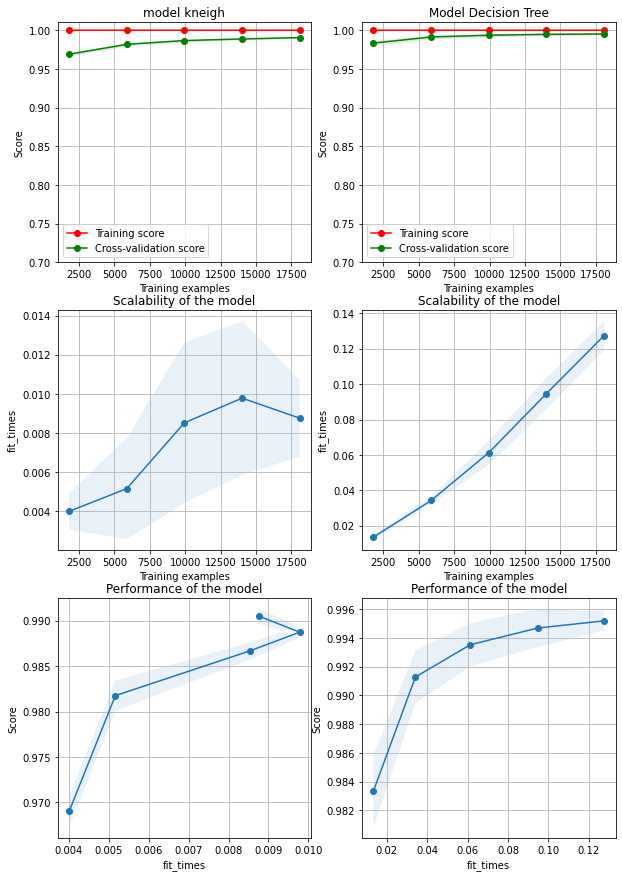

In [48]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
cv = ShuffleSplit(n_splits=10, test_size=0.23, random_state=0)
plot_learning_curve(modelKneigh, "model kneigh", XP, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=3)

plot_learning_curve(modelDecisionTree, "Model Decision Tree", X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=2)

KeyboardInterrupt: 

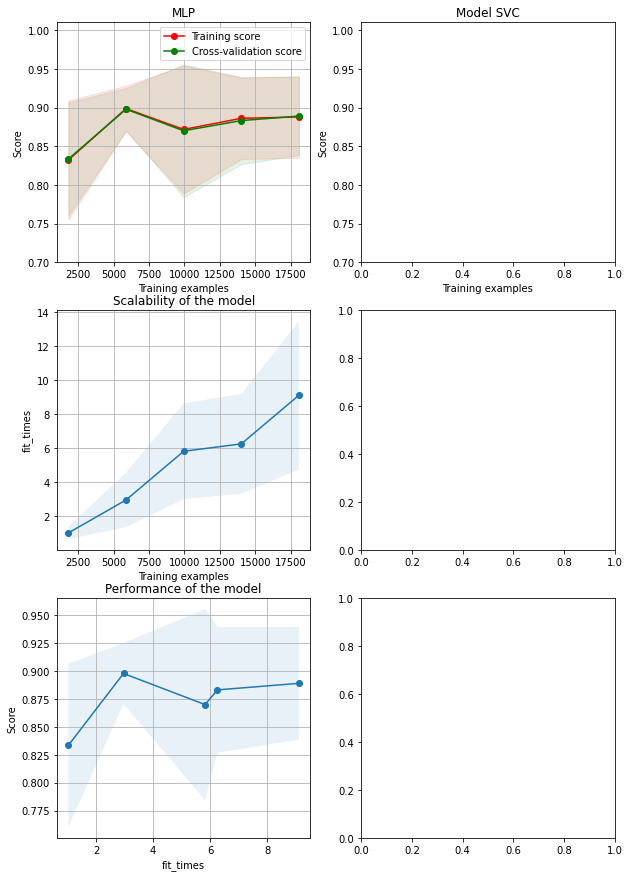

In [49]:
modelMLP=MLPClassifier(activation='relu', solver='adam',learning_rate='adaptive', max_iter=200,nesterovs_momentum=True)
modelSVC=SVC(kernel='poly',random_state=None,degree=1, gamma='scale', probability=True,
              decision_function_shape='ovo')
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
cv = ShuffleSplit(n_splits=10, test_size=0.23, random_state=0)
plot_learning_curve(modelMLP, "MLP", XP, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=3)

plot_learning_curve(modelSVC, "Model SVC", X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=2)

In [54]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
 
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt
def rocCurves(model,y_test,X_test,X_train,y_train):
    ns_probs = [0 for _ in range(len(y_test))]
    model.fit(X_train, y_train)
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.993


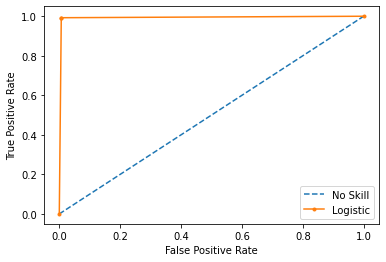

In [ ]:
# CONFUSION MATRIX




# CONFUSION MATRIX+METRIC 4 mera



pca


DES PWS CLASSIFIERS KTL
crossvalidation   pws tha to pas tlk?
+METRICS 
APOTELESMATA PLOTARIZW +TIMES P MPORW NA VALW +CONFUSION MATRIX?
+APOTHIKEUSI i na fainetai omorfo i describe
telos strwsto kai diavase


wraia full ta panw
kai gia methaurio pes strwneis diavazeis
+oti extra +parameters+emfanisi

# 


HYPERTUNING 1.OXI SE OLA
2.learning curve
3.+anevaseta sto github +parousiasi?apotelesmata?
+anevaseta sto github +parousiasi?
+strwsta

+DIAGRAMMATA telos

# IMPUTATION NOT NEEDED
# STRATIFIED
# gridcv
# 


